In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats.contingency import chi2_contingency
import seaborn as sns
from datetime import datetime, date, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cardio_df = pd.read_excel('/content/drive/MyDrive/ECGDataSplit.xlsx')
cardio_df

,Id,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W13,W14,W15,W16,W17,W18,W19,Sigmean,Sigvar,Targ
0,16265-1,0.998845,0.001311,-0.000825,0.000938,-0.000323,0.000359,0.000236,-0.000631,0.000978,...,0.000232,0.000092,-0.000156,0.000209,-0.000112,0.000062,-0.000014,0.050047,0.045124,1
1,16265-2,1.000209,-0.000208,0.000874,-0.001100,0.001116,-0.001360,0.001765,-0.002080,0.002026,...,-0.000506,0.000450,-0.000346,0.000320,0.000070,-0.000313,0.000250,0.050030,0.045257,1
2,16265-3,0.999929,-0.000454,0.000488,-0.000849,0.000701,-0.001402,0.001639,-0.001835,0.001695,...,-0.000632,0.000441,-0.000380,-0.000058,0.000074,-0.000376,0.000446,0.049916,0.045241,1
3,16265-4,1.000160,-0.000308,0.000608,-0.000750,0.000948,-0.001185,0.001160,-0.001450,0.001285,...,-0.000418,0.000103,0.000340,-0.000752,0.000875,-0.000850,0.001025,0.050012,0.045253,1
4,16265-5,0.999573,-0.000067,0.000388,-0.000312,0.001245,-0.001469,0.001419,-0.001412,0.001643,...,-0.000761,0.000774,-0.000474,0.000275,-0.000055,-0.000053,0.000396,0.050047,0.045194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,234-6,1.000263,-0.000075,0.000164,-0.000234,0.000060,-0.000079,0.000015,-0.000037,0.000009,...,-0.000186,0.000364,-0.000227,0.000312,-0.000071,-0.000368,0.000004,0.049999,0.047526,0
201,234-7,1.000525,0.000100,0.000116,-0.000183,-0.000245,0.000431,-0.000712,0.000785,-0.000930,...,0.000619,-0.000360,0.000383,-0.000016,0.000193,-0.000284,-0.000751,0.049988,0.047554,0
202,234-8,1.000605,0.000168,0.000268,-0.000314,-0.000343,0.000683,-0.001125,0.001271,-0.001572,...,0.001419,-0.001167,0.001018,-0.000561,0.000584,-0.000282,-0.001071,0.049976,0.047564,0
203,234-9,1.000698,-0.000256,0.000681,-0.000558,-0.000188,0.000648,-0.001128,0.001391,-0.001815,...,0.002074,-0.001887,0.001622,-0.001281,0.001042,-0.000589,-0.000739,0.049974,0.047574,0


In [4]:
cardio_df=cardio_df.drop(['Id'],axis=1)
cardio_df

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W13,W14,W15,W16,W17,W18,W19,Sigmean,Sigvar,Targ
0,0.998845,0.001311,-0.000825,0.000938,-0.000323,0.000359,0.000236,-0.000631,0.000978,-0.000808,...,0.000232,0.000092,-0.000156,0.000209,-0.000112,0.000062,-0.000014,0.050047,0.045124,1
1,1.000209,-0.000208,0.000874,-0.001100,0.001116,-0.001360,0.001765,-0.002080,0.002026,-0.001841,...,-0.000506,0.000450,-0.000346,0.000320,0.000070,-0.000313,0.000250,0.050030,0.045257,1
2,0.999929,-0.000454,0.000488,-0.000849,0.000701,-0.001402,0.001639,-0.001835,0.001695,-0.001962,...,-0.000632,0.000441,-0.000380,-0.000058,0.000074,-0.000376,0.000446,0.049916,0.045241,1
3,1.000160,-0.000308,0.000608,-0.000750,0.000948,-0.001185,0.001160,-0.001450,0.001285,-0.001613,...,-0.000418,0.000103,0.000340,-0.000752,0.000875,-0.000850,0.001025,0.050012,0.045253,1
4,0.999573,-0.000067,0.000388,-0.000312,0.001245,-0.001469,0.001419,-0.001412,0.001643,-0.001441,...,-0.000761,0.000774,-0.000474,0.000275,-0.000055,-0.000053,0.000396,0.050047,0.045194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.000263,-0.000075,0.000164,-0.000234,0.000060,-0.000079,0.000015,-0.000037,0.000009,-0.000018,...,-0.000186,0.000364,-0.000227,0.000312,-0.000071,-0.000368,0.000004,0.049999,0.047526,0
201,1.000525,0.000100,0.000116,-0.000183,-0.000245,0.000431,-0.000712,0.000785,-0.000930,0.000926,...,0.000619,-0.000360,0.000383,-0.000016,0.000193,-0.000284,-0.000751,0.049988,0.047554,0
202,1.000605,0.000168,0.000268,-0.000314,-0.000343,0.000683,-0.001125,0.001271,-0.001572,0.001611,...,0.001419,-0.001167,0.001018,-0.000561,0.000584,-0.000282,-0.001071,0.049976,0.047564,0
203,1.000698,-0.000256,0.000681,-0.000558,-0.000188,0.000648,-0.001128,0.001391,-0.001815,0.001965,...,0.002074,-0.001887,0.001622,-0.001281,0.001042,-0.000589,-0.000739,0.049974,0.047574,0


In [5]:
cardio_df_corr=cardio_df.drop(['Targ'],axis=1)
abs(cardio_df_corr.corr()).style.background_gradient(cmap='copper').set_precision(2)

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,Sigmean,Sigvar
W0,1.00,0.94,0.12,0.92,0.95,0.94,0.93,0.92,0.60,0.72,0.83,0.86,0.84,0.88,0.67,0.56,0.64,0.81,0.82,0.93,0.04,0.94
W1,0.94,1.00,0.44,0.98,0.85,0.88,0.87,0.91,0.50,0.82,0.83,0.91,0.81,0.92,0.55,0.62,0.75,0.81,0.77,0.90,0.02,0.89
W2,0.12,0.44,1.00,0.47,0.05,0.13,0.09,0.24,0.11,0.48,0.16,0.42,0.10,0.39,0.21,0.41,0.54,0.18,0.13,0.16,0.10,0.13
W3,0.92,0.98,0.47,1.00,0.77,0.91,0.81,0.90,0.47,0.76,0.75,0.89,0.74,0.91,0.46,0.68,0.77,0.72,0.79,0.84,0.04,0.86
W4,0.95,0.85,0.05,0.77,1.00,0.82,0.96,0.81,0.66,0.70,0.83,0.78,0.87,0.78,0.76,0.39,0.47,0.86,0.71,0.94,0.17,0.90
W5,0.94,0.88,0.13,0.91,0.82,1.00,0.76,0.94,0.44,0.56,0.79,0.78,0.77,0.84,0.56,0.61,0.69,0.65,0.87,0.79,0.07,0.89
W6,0.93,0.87,0.09,0.81,0.96,0.76,1.00,0.73,0.78,0.82,0.71,0.85,0.77,0.83,0.65,0.46,0.51,0.84,0.65,0.94,0.19,0.85
W7,0.92,0.91,0.24,0.90,0.81,0.94,0.73,1.00,0.25,0.55,0.91,0.72,0.86,0.78,0.66,0.50,0.65,0.74,0.79,0.82,0.03,0.89
W8,0.60,0.50,0.11,0.47,0.66,0.44,0.78,0.25,1.00,0.71,0.18,0.71,0.29,0.65,0.22,0.46,0.36,0.44,0.45,0.59,0.15,0.53
W9,0.72,0.82,0.48,0.76,0.70,0.56,0.82,0.55,0.71,1.00,0.47,0.94,0.48,0.88,0.24,0.66,0.71,0.63,0.58,0.74,0.05,0.66


In [6]:
y=cardio_df['Targ']
y.shape

(205,)

In [7]:
cardio_df3=cardio_df[['Sigmean','Sigvar']]
# scalar = StandardScaler()
# scaled_datadf3 = pd.DataFrame(scalar.fit_transform(cardio_df3)) #scaling the data

In [8]:
cardio_df2=cardio_df.drop(['Targ','Sigmean','Sigvar'],axis=1)

In [9]:
# list(cardio_df2.columns)

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(cardio_df2, 0.9)
print(len(set(corr_features)))
corr_features

13


{'W1',
 'W10',
 'W11',
 'W12',
 'W13',
 'W16',
 'W17',
 'W19',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7'}

In [12]:
cardio_df2=cardio_df2.drop(corr_features,axis=1)

In [13]:
resultdf = pd.concat([cardio_df2, cardio_df3], axis=1)

In [14]:
resultdf.shape

(205, 9)

In [15]:
abs(resultdf.corr()).style.background_gradient(cmap='copper').set_precision(2)

,W0,W2,W8,W9,W14,W15,W18,Sigmean,Sigvar
W0,1.00,0.12,0.60,0.72,0.67,0.56,0.82,0.04,0.94
W2,0.12,1.00,0.11,0.48,0.21,0.41,0.13,0.10,0.13
W8,0.60,0.11,1.00,0.71,0.22,0.46,0.45,0.15,0.53
W9,0.72,0.48,0.71,1.00,0.24,0.66,0.58,0.05,0.66
W14,0.67,0.21,0.22,0.24,1.00,0.22,0.30,0.27,0.63
W15,0.56,0.41,0.46,0.66,0.22,1.00,0.78,0.29,0.54
W18,0.82,0.13,0.45,0.58,0.30,0.78,1.00,0.16,0.81
Sigmean,0.04,0.10,0.15,0.05,0.27,0.29,0.16,1.00,0.08
Sigvar,0.94,0.13,0.53,0.66,0.63,0.54,0.81,0.08,1.00


In [16]:
corr_features = correlation(resultdf, 0.9)
print(len(set(corr_features)))
corr_features

1


{'Sigvar'}

In [17]:
resultdf=resultdf.drop(corr_features,axis=1)

In [18]:
resultdf.shape

(205, 8)

In [19]:
#cardio_model.info()
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

param_dict = {
                'C':[0.001,0.01,0.1,1,10,100,1000]
                                  
            }
clf = GridSearchCV(LogisticRegression(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_


{'C': 0.01}


0.5707317073170732

In [20]:
#cardio_model.info()
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)


#preprocessing
#sc.fit(X_train)
X_train = sc.fit_transform(X_train)

#training the model
model = LogisticRegression(C=0.01)
model.fit(X_train,y_train)
model.intercept_
model.coef_

#test the model
X_test = sc.transform(X_test)
y_pred = model.predict(X_test) 

#performance measures'''


cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
tpr = recall_score(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))


[[16  7]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        23
           1       0.70      0.89      0.78        18

    accuracy                           0.78        41
   macro avg       0.79      0.79      0.78        41
weighted avg       0.80      0.78      0.78        41



In [21]:
#k-fold cross_validation 
model = LogisticRegression(C=.01)
model.fit(X_scaled,y)
model.intercept_
model.coef_
print('Logistic Regression Results for 5-fold Cross-validation')
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Logistic Regression Results for 5-fold Cross-validation
Accuracy score: 0.5707
Precision: 0.5957288008422309
Recall: 0.5730952380952381


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)


param_dict = {
                'n_neighbors':range(1,11)
                                  
                 }
clf = GridSearchCV(KNeighborsClassifier(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_

{'n_neighbors': 1}


0.8195121951219513

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)


X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[21  2]
 [ 6 12]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.86      0.67      0.75        18

    accuracy                           0.80        41
   macro avg       0.82      0.79      0.79        41
weighted avg       0.81      0.80      0.80        41



In [24]:
#k-fold cross_validation 
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('KNN results with 5-fold cross validation')
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

KNN results with 5-fold cross validation
Accuracy score: 0.8195
Precision: 0.8394230769230768
Recall: 0.8169047619047619


In [25]:
X = resultdf
y = y

from sklearn.ensemble import AdaBoostClassifier


param_dict= { 'n_estimators': range(10,111,10)}

clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),random_state=0),param_dict,cv=5)
clf.fit(X,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)

{'n_estimators': 50} 0.8829268292682928


In [26]:
X = resultdf
y = y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=50,random_state=0)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[22  1]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        18

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



In [27]:
#k-fold cross_validation 
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=50,random_state=0)
scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision
scores_recall=cross_val_score(model,X,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.8829268292682928
Precision: 0.8945745044429255
Recall: 0.8816666666666666


In [28]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(cardio_df_corr)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.169595,-0.188251,0.126798,-0.146815,-0.206274,-0.091801,-0.125543,-0.377018,0.468876,-0.146880,...,0.372427,0.277058,0.134601,0.060404,-0.119332,-0.213689,-0.159295,-0.189842,0.895328,-0.181685
1,0.202166,-0.256489,0.341177,-0.385086,-0.000130,-0.472399,0.288284,-0.760200,1.034035,-0.561251,...,0.551288,0.080245,0.278727,-0.033099,-0.075558,-0.158637,-0.273803,-0.139056,0.568313,-0.140313
2,0.195476,-0.267515,0.292428,-0.355844,-0.059553,-0.481767,0.254075,-0.695236,0.855901,-0.609747,...,0.525421,0.046594,0.274928,-0.049778,-0.225117,-0.157420,-0.293096,-0.101211,-1.616362,-0.145308
3,0.200982,-0.260964,0.307618,-0.344253,-0.024114,-0.433655,0.124494,-0.593562,0.634670,-0.469696,...,0.432097,0.103659,0.138871,0.304159,-0.499009,0.084665,-0.437798,0.010111,0.228693,-0.141420
4,0.186985,-0.250141,0.279783,-0.293024,0.018409,-0.496584,0.194608,-0.583515,0.827548,-0.400686,...,0.551029,0.011991,0.409222,-0.095994,-0.093206,-0.196296,-0.194190,-0.110882,0.887536,-0.159865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.203440,-0.250499,0.251520,-0.283917,-0.151312,-0.188790,-0.185485,-0.219743,-0.053971,0.170133,...,0.242409,0.165514,0.244127,0.025020,-0.078924,-0.201402,-0.290417,-0.186345,-0.024186,0.568034
201,0.209691,-0.242652,0.245538,-0.277892,-0.195003,-0.075958,-0.382220,-0.002409,-0.560443,0.548927,...,-0.000023,0.380279,-0.047276,0.325442,-0.208397,-0.121344,-0.264918,-0.331541,-0.239749,0.576654
202,0.211616,-0.239566,0.264681,-0.293212,-0.209153,-0.020102,-0.493867,0.126209,-0.907128,0.823635,...,-0.230624,0.593725,-0.371948,0.637527,-0.423574,-0.003178,-0.264287,-0.393219,-0.461723,0.579788
203,0.213840,-0.258625,0.316766,-0.321713,-0.186943,-0.027915,-0.494920,0.157815,-1.038097,0.965631,...,-0.410788,0.768529,-0.661945,0.934804,-0.708217,0.135141,-0.357908,-0.329398,-0.515298,0.583052


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca

,PC1,PC2,PC3,PC4,PC5
0,-0.579722,-0.000909,-0.925665,-0.187552,0.650850
1,-0.552075,-0.344701,-1.878094,-0.050429,0.040888
2,-0.578076,-0.873951,-1.004163,0.622123,-1.772199
3,-0.671521,0.146921,-1.359027,-0.144910,-0.349557
4,-0.537700,-0.272691,-1.648181,-0.148708,0.457002
...,...,...,...,...,...
200,-0.948023,-0.097394,-0.171076,0.105944,-0.045836
201,-1.117776,0.429200,0.666239,0.192690,-0.087657
202,-1.249923,0.995230,1.266366,0.261077,-0.254222
203,-1.343757,1.585350,1.482381,0.237429,-0.422311


In [30]:
pca.explained_variance_ratio_

array([0.66853252, 0.14835187, 0.07091725, 0.05607235, 0.02961038])

In [31]:
data_pca=data_pca.drop(['PC5'],axis=1)

In [32]:
#cardio_model.info()
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

param_dict = {
                'C':[0.001,0.01,0.1,1,10,100,1000]
                                  
            }
clf = GridSearchCV(LogisticRegression(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_


{'C': 0.001}


0.5121951219512195

In [33]:
#cardio_model.info()
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)


#preprocessing
#sc.fit(X_train)
X_train = sc.fit_transform(X_train)

#training the model
model = LogisticRegression(C=0.001)
model.fit(X_train,y_train)
model.intercept_
model.coef_

#test the model
X_test = sc.transform(X_test)
y_pred = model.predict(X_test) 

#performance measures'''


cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
tpr = recall_score(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[15  8]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.62      0.72      0.67        18

    accuracy                           0.68        41
   macro avg       0.68      0.69      0.68        41
weighted avg       0.69      0.68      0.68        41



In [34]:
#k-fold cross_validation 
model = LogisticRegression(C=.001)
model.fit(X_scaled,y)
model.intercept_
model.coef_
print('Logistic Regression Results for 5-fold Cross-validation')
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Logistic Regression Results for 5-fold Cross-validation
Accuracy score: 0.5122
Precision: 0.25609756097560976
Recall: 0.5


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)


param_dict = {
                'n_neighbors':range(1,11)
                                  
                 }
clf = GridSearchCV(KNeighborsClassifier(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_

{'n_neighbors': 1}


0.7609756097560976

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)



X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[21  2]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.88      0.78      0.82        18

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41



In [37]:
#k-fold cross_validation 
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('KNN results with 5-fold cross validation')
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

KNN results with 5-fold cross validation
Accuracy score: 0.761
Precision: 0.7913944046749519
Recall: 0.7578571428571429


In [38]:
X = data_pca
y = y

from sklearn.ensemble import AdaBoostClassifier


param_dict= { 'n_estimators': range(10,111,10)}

clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),random_state=0),param_dict,cv=5)
clf.fit(X,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)

{'n_estimators': 50} 0.8878048780487806


In [39]:
X = data_pca
y = y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=50,random_state=0)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[21  2]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.88      0.83      0.86        18

    accuracy                           0.88        41
   macro avg       0.88      0.87      0.88        41
weighted avg       0.88      0.88      0.88        41



In [40]:
#k-fold cross_validation 
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=20,random_state=0)
scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision
scores_recall=cross_val_score(model,X,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.8829268292682928
Precision: 0.886434572927708
Recall: 0.8821428571428571


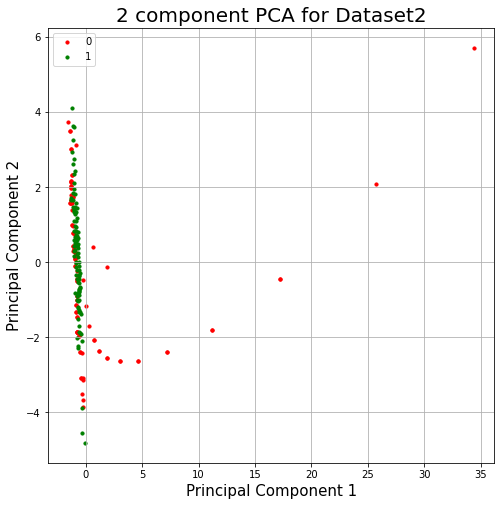

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Dataset2', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(data_pca.loc[indicesToKeep, 'PC1']
               , data_pca.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [42]:
from sklearn.manifold import TSNE
Xembedded=TSNE(n_components=2,perplexity=30,n_iter=4000,random_state=0).fit_transform(data_pca)

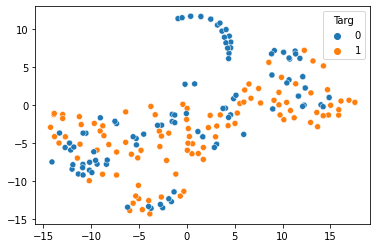

In [44]:
sns.scatterplot(Xembedded[:,0],Xembedded[:,1],hue=y)
plt.show()